In [314]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from tqdm import tqdm
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D

#PARTE 1
class Particle():
    
    #init
    def __init__(self, r0, v0, a0, t, m, R, color, Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.U = 0
        self.K = 0
        self.E = 0
        self.color = color
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(r0)))
        self.aVector = np.zeros((len(t),len(r0)))
        self.UVector = np.zeros(len(t))
        self.KVector = np.zeros(len(t))
        self.EVector = np.zeros(len(t))
        
        
        self.m = m
        self.radius = R
        self.Id = Id
        
    #Methods
    def Evolution(self, i):
        
        self.SetPosition(i, self.r)
        self.SetVelocity(i, self.v)
        self.SetU(i, self.U)
        self.SetK(i,self.K)
        self.SetE(i,self.E)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
        self.Seta(i,self.a)
        
        self.a = 0
        #self.U = 0

    
    def CheckCollision(self, Particles):
        #NO APLICAR FUERZA A SI MISMO
        F = np.zeros(2)
        
        K = 100
        
        for i in range(len(Particles)):
            if Particles[i].GetId() != self.Id:
                Resta_Vec = self.r - Particles[i].GetPosition()
                Filtro = np.sqrt(np.dot(Resta_Vec, Resta_Vec))
                n = Resta_Vec/Filtro 
                if Filtro < self.radius + Particles[i].GetR():
                    F += K*(Filtro**3)*n
        self.a = F/self.m
                        

    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = -self.v[i]
                
    def CheckWallLimits2(self,limits,dim=3):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = -self.v[i]
    
    def EnergiaPotencial(self, Particles):
        K = 100
        self.U = 0
        for i in range(len(Particles)):
            if Particles[i].GetId() != self.Id:
                Resta_Vec = self.r - Particles[i].GetPosition()
                Filtro = np.sqrt(np.dot(Resta_Vec, Resta_Vec))
                n = Resta_Vec/Filtro 
                if Filtro < self.radius + Particles[i].GetR():
                    self.U += (1/4)*K*(Filtro**4)
    
    def EnergiaCinetica(self):
        v_dot = np.dot(self.v,self.v)

        self.K = 0.5*self.m*(v_dot)
        
    def EnergiaMecanica(self):
        
        self.E = self.K + self.U
    
    
    #Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    def SetU(self,i,U):
        self.UVector[i] = U
    
    def SetK(self,i,K):
        self.KVector[i] = K
    
    def SetE(self,i,E):
        self.EVector[i] = E
    
    def Seta(self,i,a):
        self.aVector[i] = a
    
    #Getters
    def GetPosition(self):
        return self.r
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetR(self):
        return self.radius
    
    def GetMass(self):
        return self.m
    
    def GetColor(self):
        return self.color
    
    def GetUVector(self):
        return self.UVector
    
    def GetKVector(self):
        return self.KVector
    
    def GetEVector(self):
        return self.EVector
    
    def GetaVector(self):
        return self.aVector
    
    def GetId(self):
        return self.Id
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
    
    
#Discretization
dt = 0.001
tmax = 10
t = np.arange(0,tmax+dt,dt)


def GetParticle(x0,v0,a0,t,m,R,color,Id):
        
    p = Particle(x0,v0,a0,t,m,R,color,Id)
        
    return p

In [332]:
Particles_ = []
colores = ['r','yellow','k']
masas = [1.,1.,1.]
Radios = [2.,2.,2.]
x0s = np.array([[7.,0.],[0.,-1.6],[-15.,-15.]])
v0s = np.array([[20.,0.],[0.,0.],[0.,0.]])
a0s = np.array([[0.,0.],[0.,0.],[0.,0.]])

for i in range(len(masas)):
    Particles_.append(GetParticle(x0s[i],v0s[i],a0s[i],t,masas[i],Radios[i],colores[i],i))


In [333]:
Limits = np.array([20.,20.])

In [334]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            Particles[i].CheckWallLimits(Limits)
            Particles[i].CheckCollision(Particles)
            Particles[i].EnergiaPotencial(Particles)
            Particles[i].EnergiaCinetica()
            Particles[i].EnergiaMecanica()
            
            Particles[i].Evolution(it)
        
        
    return Particles

In [335]:
Ptcl = RunSimulation(t,Particles_)

100%|███████████████████████████████████| 10001/10001 [00:01<00:00, 6865.94it/s]


In [336]:
def ReduceTime(t,factor):
    
    for p in Ptcl:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


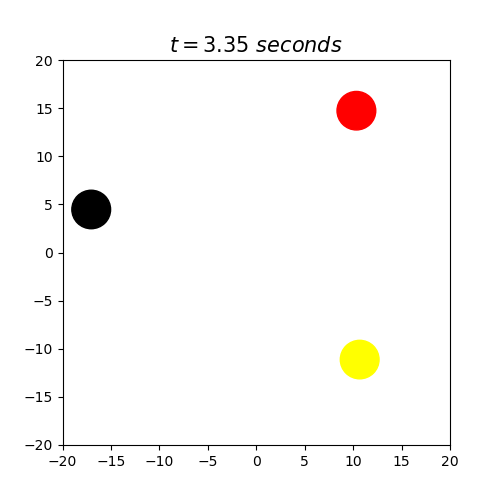

In [337]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Ptcl:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1] 
        
        
        circle = plt.Circle( (x,y), p.GetR(), color=p.GetColor(), fill=True)
        plot = ax.add_patch(circle)

    return plot


Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('Billar.mp4', writer=writer_)


[  0.           0.           0.         ... 453.50619306 453.50619306
 453.50619306] [  0.           0.           0.         ... 453.50619306 453.50619306
 453.50619306] [0. 0. 0. ... 0. 0. 0.]


<IPython.core.display.Javascript object>


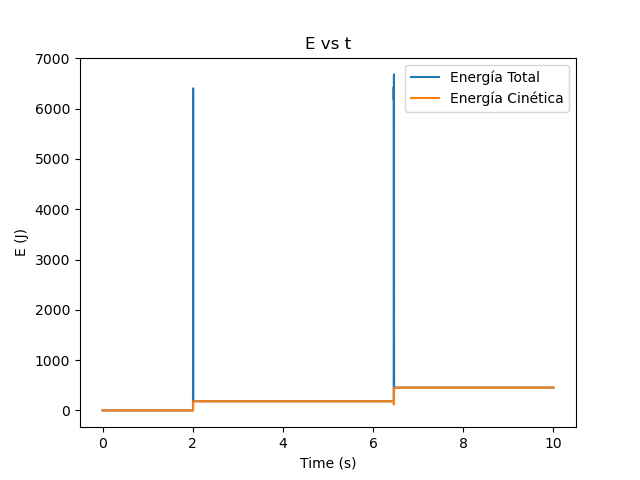

In [338]:
def EMFig(t):
    
    Etot = np.zeros(len(Particles_[0].GetEVector()))
    Ktot = np.zeros(len(Particles_[0].GetEVector()))
    Utot = np.zeros(len(Particles_[0].GetEVector()))
    
    for i in range(len(Particles_)):
        for j in range(len(Particles_[i].GetEVector())):
            Etot[j] = Particles_[i].GetEVector()[j]
            Ktot[j] = Particles_[i].GetKVector()[j]
            Utot[j] = Particles_[i].GetUVector()[j]
    
    print(Ktot,Etot,Utot)
        
    plt.figure()
    
    plt.plot(t,Etot, label = 'Energía Total')
    plt.plot(t,Ktot, label = 'Energía Cinética')
    #plt.plot(t,Utot/2, label = 'Energía Potencial')
    
    plt.xlabel('Time (s)')
    plt.ylabel('E (J)')
    
    plt.title('E vs t')
    
    plt.legend()
    
    plt.savefig('Energia.png')
    
    return None

EMFig(t)

<IPython.core.display.Javascript object>


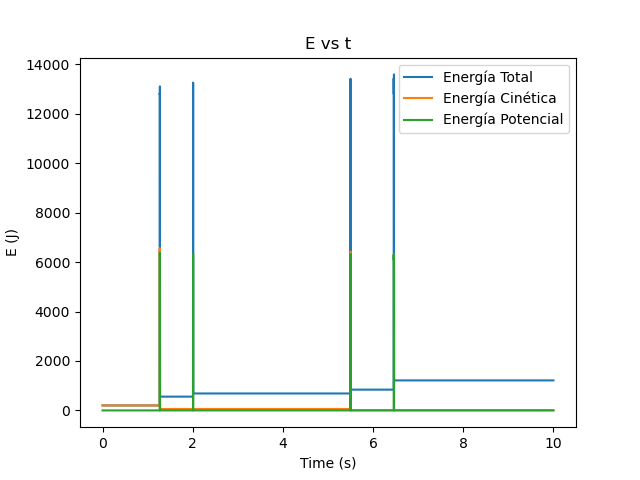

In [339]:
def EMFig(t):
    
    Etot = np.zeros(len(Particles_[0].GetEVector()))
    Ktot = np.zeros(len(Particles_[0].GetEVector()))
    Utot = np.zeros(len(Particles_[0].GetEVector()))
    
    for i in range(len(Particles_)):
        Etot += Ptcl[i].GetEVector()
        Ktot += Ptcl[i].GetKVector()
        Utot += Ptcl[i].GetUVector()
    
        
    plt.figure()
    
    plt.plot(t,Etot, label = 'Energía Total')
    plt.plot(t,Ptcl[0].GetEVector(), label = 'Energía Cinética')
    plt.plot(t,Utot/2, label = 'Energía Potencial')
    
    plt.xlabel('Time (s)')
    plt.ylabel('E (J)')
    
    plt.title('E vs t')
    
    plt.legend()
    
    plt.savefig('Energia.png')
    
    return None

EMFig(t)


a) ¿Cuál es el significado físico de K?
A juzgar por sus unidades (N/m^3) y por su papel en la ecuación de fuerza, podemos concluir que K es una especie de 
factor de compresión de la pelota, que nos dice qué tanta fuerza se necesita para comprimirla una distancia r. En 
sentido, K es un análogo a la constante de elasticidad de un resorte. 
b) ¿Es conservativa la fuerza?
La fuerza es conservativa debido a que a esta se le asocia una energía potencial cuyo valor, sumado a la cinética del
cuerpo en cada punto es una constante. Visto de otra forma, la fuerza no es responsable de una pérdida de energía del
del sistema. 

In [74]:
#PARTE 2
n = 1
cv = (3/2)*8.314
k = 389.6
A = 0.01
l = 0.30
c = (k*A)/(n*cv*l)

r0 = [400. , 200.]

N = 100
t = np.linspace(0.,8.,N)

In [75]:
def T1_Analitico(t):
    return 300 + 100*np.exp(-2*c*t)

def T2_Analitico(t):
    return 300 - 100*np.exp(-2*c*t)

In [76]:
def f0(T1,T2,n,cv,k,A,l):
    return -c*(T1 - T2)

def f1(T1,T2,n,cv,k,A,l):
    return c*(T1 - T2)

In [79]:
def GetRK4(f0,f1,r0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    T1 = np.zeros(len(t))
    T2 = np.zeros(len(t))
    
    T1[0] = r0[0]
    T2[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(T1[i-1],T2[i-1],n,cv,k,A,l)
        K1[1] = f1(T1[i-1],T2[i-1],n,cv,k,A,l)
        
        K2[0] = f0(T1[i-1] + h*0.5*K1[0],T2[i-1] + 0.5*h*K1[1],n,cv,k,A,l)
        K2[1] = f1(T1[i-1] + h*0.5*K1[0],T2[i-1] + 0.5*h*K1[1],n,cv,k,A,l)
        
        K3[0] = f0(T1[i-1] + h*0.5*K2[0],T2[i-1] + 0.5*h*K2[1],n,cv,k,A,l)
        K3[1] = f1(T1[i-1] + h*0.5*K2[0],T2[i-1] + 0.5*h*K2[1],n,cv,k,A,l)
        
        K4[0] = f0(T1[i-1] + h*K3[0],T2[i-1] + h*K3[1],n,cv,k,A,l)
        K4[1] = f1(T1[i-1] + h*K3[0],T2[i-1] + h*K3[1],n,cv,k,A,l)
        
              
        T1[i] = T1[i-1] + (h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])/6)
        T2[i] = T2[i-1] + (h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])/6)
        
    return T1,T2


<IPython.core.display.Javascript object>


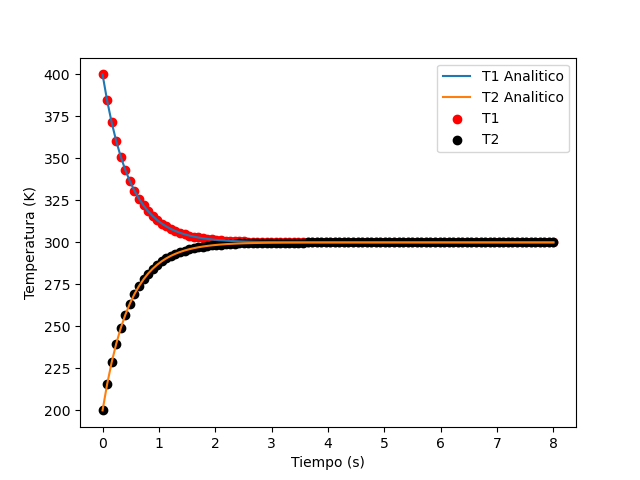

In [83]:
T1,T2 = GetRK4(f0,f1,r0,t)

plt.figure()

plt.plot(t,T1_Analitico(t), label = 'T1 Analitico')
plt.plot(t,T2_Analitico(t), label = 'T2 Analitico')
plt.scatter(t,T1, label = 'T1', color = 'r')
plt.scatter(t,T2,label = 'T2', color = 'k')
plt.ylabel('Temperatura (K)')
plt.xlabel('Tiempo (s)')

plt.legend()


e) Como se puede ver en la gráfica, el límite termodinámico de ambas funciones es de T=300 K.

In [7]:
#PARTE 3
def funcion_analitica(x):
    return -2*x*np.exp(-(x**2))

In [8]:
# importar los datos
datos = np.loadtxt('Datos.dat.txt')
x = datos[:, 0]
valores = datos[:, 1]

<IPython.core.display.Javascript object>


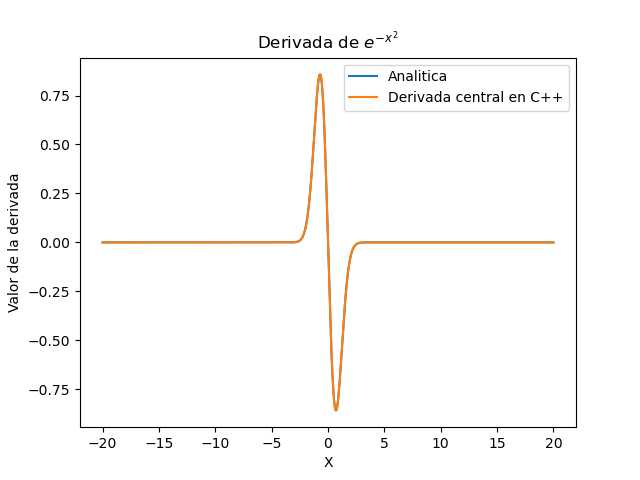

In [12]:
# Pintar la solucion

plt.figure()
plt.plot(x, funcion_analitica(x), label='Analitica')
plt.plot(x, valores, label = 'Derivada central en C++')
plt.xlabel('X')
plt.ylabel('Valor de la derivada')
plt.title('Derivada de $e^{-x^2}$')
plt.legend()
plt.show()